In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [14]:
# Load the os library
import os

# Load the request module
import urllib.request

# Import SSL which we need to setup for talking to the HTTPS server
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Create a directory
try: 
    os.mkdir('img_align_celeba')

    # Now perform the following 100 times:
    for img_i in range(1, 101):

        # create a string using the current loop counter
        f = '000%03d.jpg' % img_i

        # and get the url with that string appended the end
        url = 'https://s3.amazonaws.com/cadl/celeb-align/' + f

        # We'll print this out to the console so we can see how far we've gone
        print(url, end='\r')

        # And now download the url to a location inside our new directory
        urllib.request.urlretrieve(url, os.path.join('img_align_celeba', f))
except:
    #os.rm('img_align_celeba')
    print("You may need to delete the existing 'img_align_celeba' folder in your directory")

You may need to delete the existing 'img_align_celeba' folder in your directory


In [15]:
files = os.listdir('images_mask_123')# img.<tab>
import matplotlib.pyplot as plt
import numpy as np

print(os.path.join('images_mask_123', files[0]))
plt.imread(os.path.join('images_mask_123', files[0]))

files = [os.path.join('images_mask_123', file_i)
 for file_i in os.listdir('images_mask_123')
 if '.png' in file_i]

img = plt.imread(files[149])

print(img)

images_mask_123\maksssksksss0.png
[[[0.21960784 0.22352941 0.20784314 1.        ]
  [0.19215687 0.19607843 0.18431373 1.        ]
  [0.1764706  0.18431373 0.17254902 1.        ]
  ...
  [0.0627451  0.05882353 0.05098039 1.        ]
  [0.05882353 0.05490196 0.04705882 1.        ]
  [0.05098039 0.04705882 0.04705882 1.        ]]

 [[0.21960784 0.22352941 0.20784314 1.        ]
  [0.1882353  0.19607843 0.18431373 1.        ]
  [0.17254902 0.18039216 0.17254902 1.        ]
  ...
  [0.0627451  0.05882353 0.05098039 1.        ]
  [0.05490196 0.05490196 0.04705882 1.        ]
  [0.04705882 0.04705882 0.04705882 1.        ]]

 [[0.21568628 0.21960784 0.20392157 1.        ]
  [0.1882353  0.19215687 0.18039216 1.        ]
  [0.17254902 0.18039216 0.17254902 1.        ]
  ...
  [0.05882353 0.05490196 0.04705882 1.        ]
  [0.05490196 0.05098039 0.04705882 1.        ]
  [0.04705882 0.04705882 0.04705882 1.        ]]

 ...

 [[0.09019608 0.09019608 0.13725491 1.        ]
  [0.10980392 0.11372549

When I print out this image, I can see all the numbers that represent this image.  We can use the function `imshow` to see this:

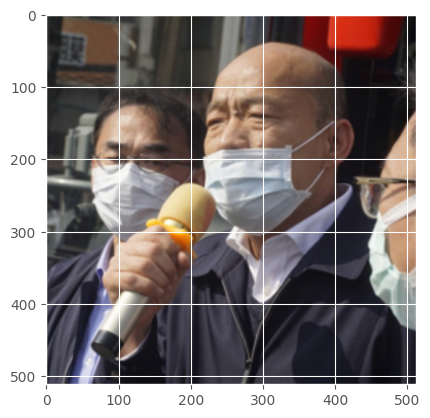

In [16]:
# If nothing is drawn and you are using notebook, try uncommenting the next line:
#%matplotlib inline
plt.imshow(img)

<a name="understanding-image-shapes"></a>
## Understanding Image Shapes

Let's break this data down a bit more.  We can see the dimensions of the data using the `shape` accessor:

In [17]:
img.shape
# (218, 178, 33)

(512, 512, 4)

## Change image orientation 

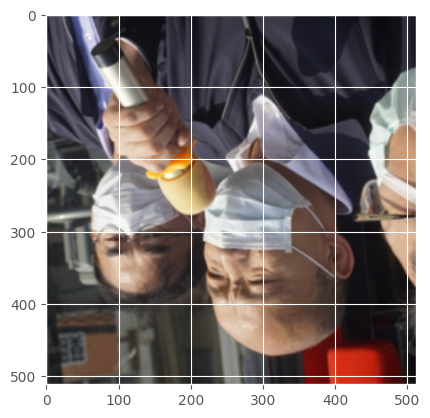

In [18]:
plt.imshow(img[::-1, :, :]) # vertical flip

This is done by array slicing,
It is equivalent to moving the last line of the picture to the first line,
Move the penultimate line to the second line, ...,
Move the first row to the last row
For row indices, use ::-1 for slices,
Negative step size means starting from the last element, go left to find the next point
For column indicators and RGB channels, only use: means that the dimension does not change

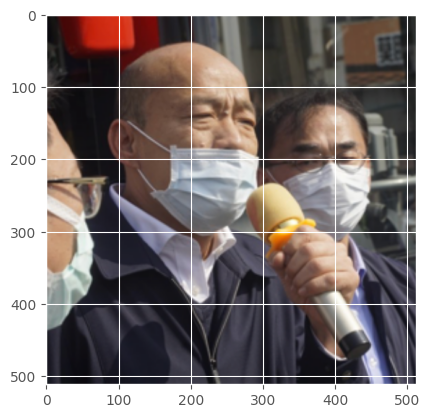

In [19]:
plt.imshow(img[:, ::-1, :]) # horizontal flip

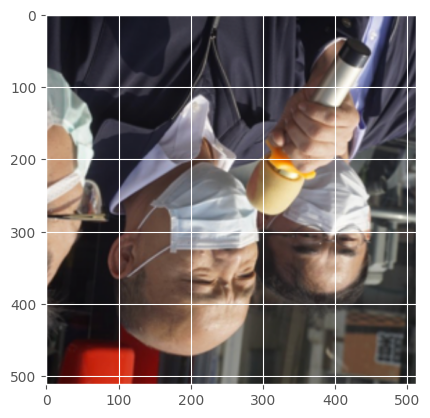

In [20]:
plt.imshow(img[::-1, ::-1, :]) #180 degree direction flip

## change image brightness

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


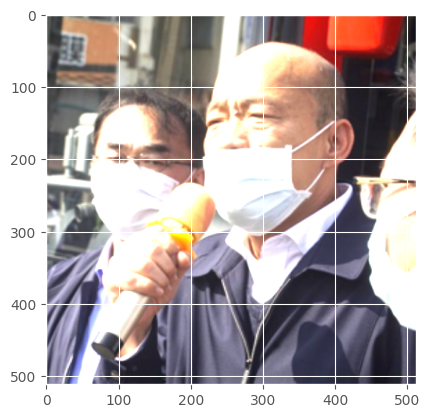

In [21]:
img6 = img * 2

plt.imshow(img6.astype('float64'))

## plot a colormap with three channels

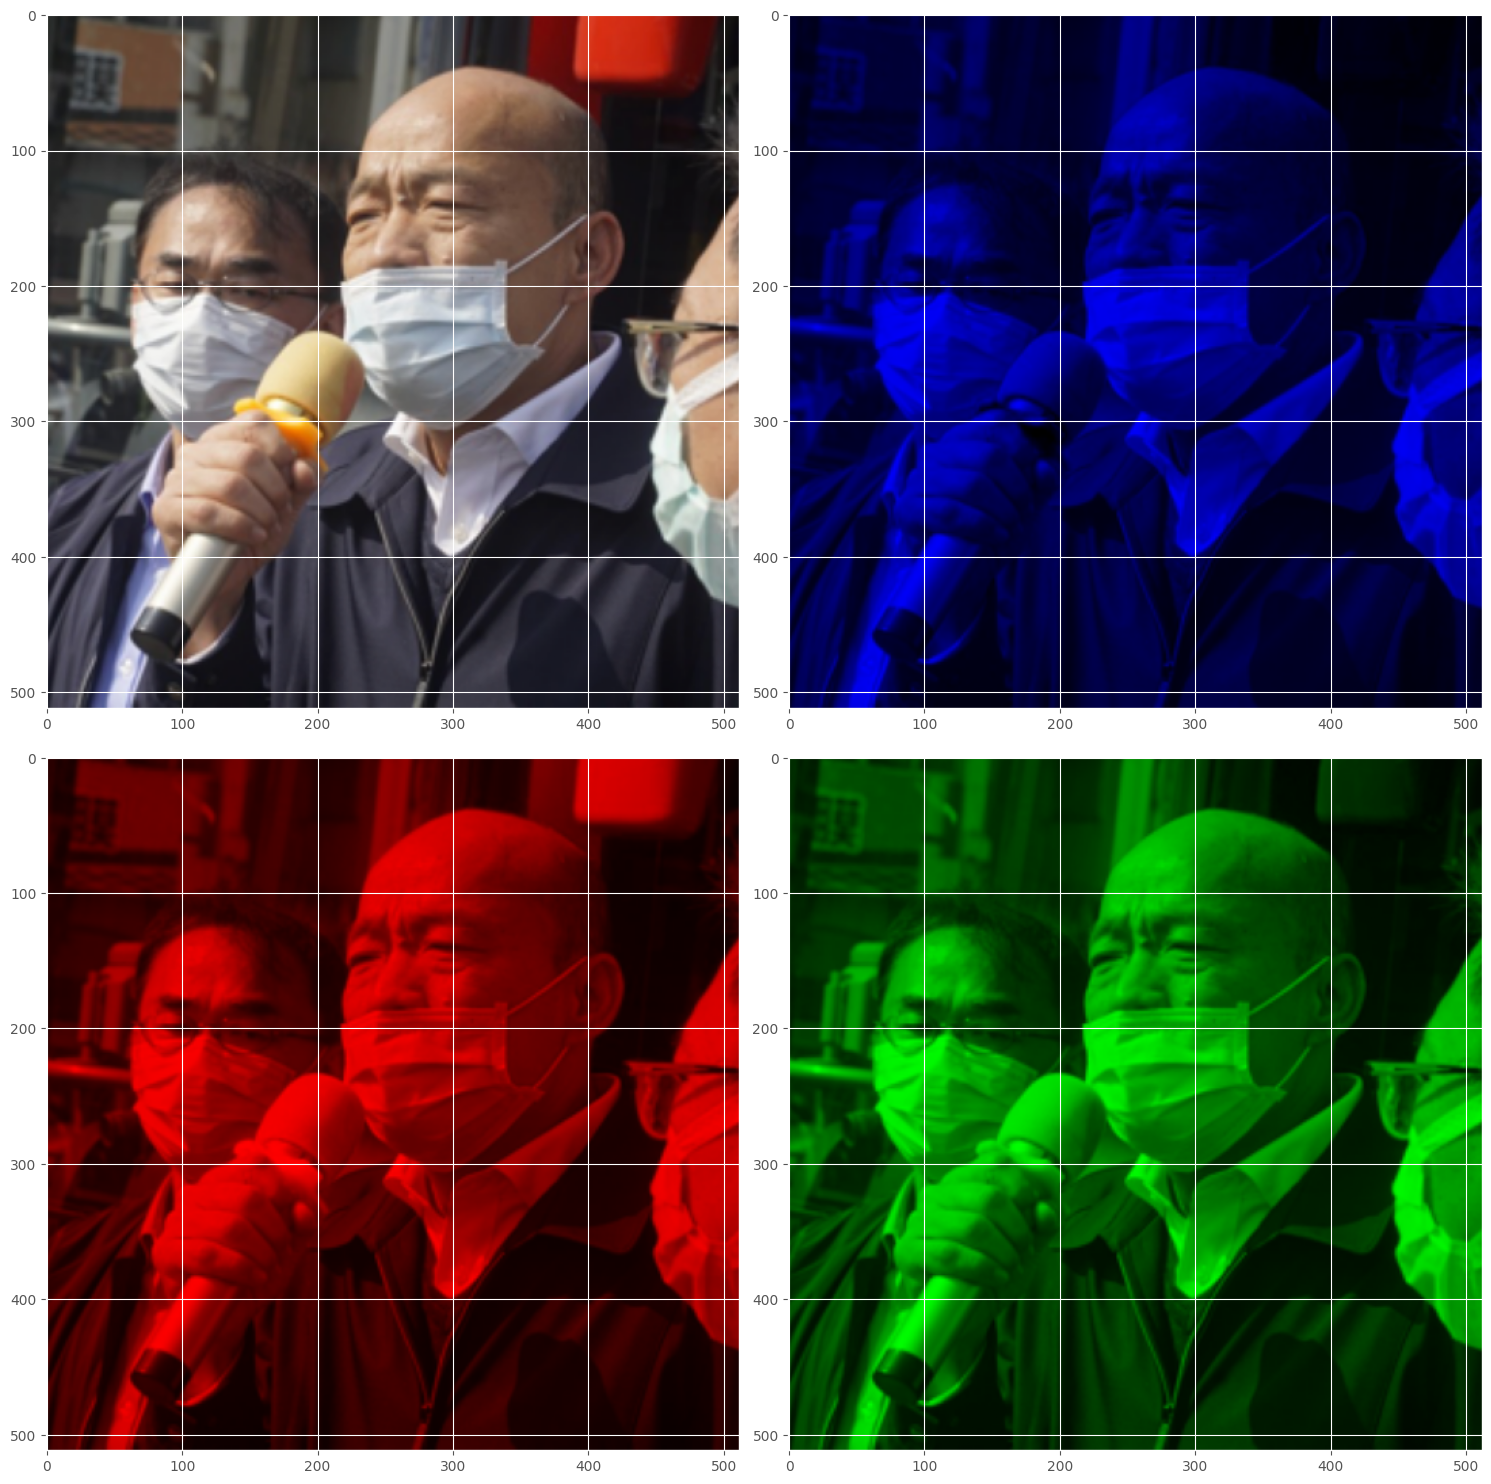

In [22]:
B_img = img.copy()
B_img[:,:, [0,1]]=0

R_img = img.copy()
R_img[:,:, [0,2]]=0

G_img = img.copy()
G_img[:,:, [2,1]]=0


fig,ax = plt.subplots(2,2)

ax[0,0].imshow(img)
ax[1,1].imshow(R_img)
ax[1,0].imshow(G_img)
ax[0,1].imshow(B_img)
fig.set_size_inches(15, 15)
plt.tight_layout()
plt.show()

## horizontal stitching

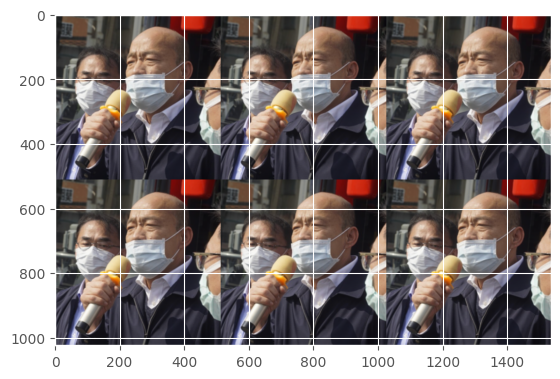

In [28]:
t1 = np.concatenate((img, img, img), axis=1) 
t2 = np.concatenate((t1, t1), axis=0)

plt.imshow(t2)
plt.show()

## Shuffle the order randomly

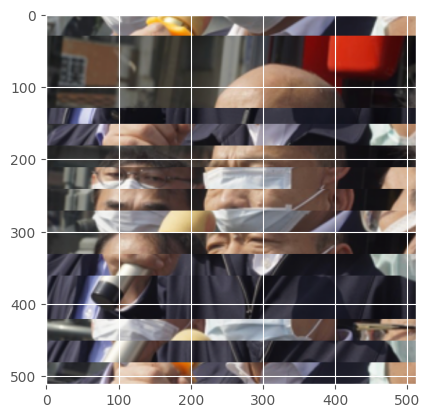

In [23]:
t = img.copy()
height=t.shape[0]

li = np.split(t, range(100, height, 30), axis=0)
np.random.shuffle(li)
t = np.concatenate(li, axis=0)
plt.imshow(t)
plt.show()

In [25]:
imgs = [plt.imread(files[file_i])
        for file_i in range(150)]

#imgs = utils.get_celeb_imgs() # nope nope nope

We now have a list containing our images.  Each index of the `imgs` list is another image which we can access using the square brackets:

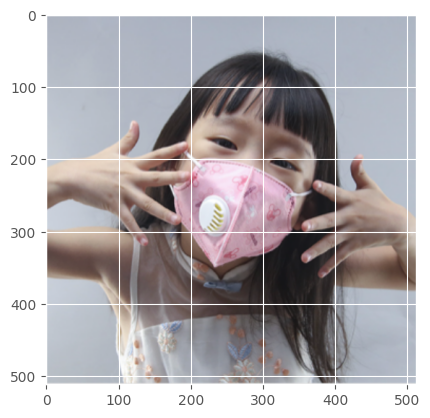

In [26]:
plt.imshow(imgs[117])

<a name="the-batch-dimension"></a>
## The Batch Dimension

Remember that an image has a shape describing the height, width, channels:

In [27]:
imgs[0].shape

(512, 512, 4)

It turns out we'll often use another convention for storing many images in an array using a new dimension called the batch dimension. The resulting image shape will be exactly the same, except we'll stick on a new dimension on the beginning... giving us number of images x the height x the width x the number of color channels.

N x H x W x C

A Color image should have 3 color channels, RGB.

We can combine all of our images to have these 4 dimensions by telling numpy to give us an array of all the images.

In [28]:
data = np.array(imgs) # make 'data' = our numpy array
data.shape
print(data.shape)
print("The shape of our new 'data' object is a 'batch' of 100 images, with a height of 218, width of 178, and 3 colour channels")
print("If your images aren't all the same size to begin with, then this won't work!")

(150, 512, 512, 4)
The shape of our new 'data' object is a 'batch' of 100 images, with a height of 218, width of 178, and 3 colour channels
If your images aren't all the same size to begin with, then this won't work!


This will only work if every image in our list is exactly the same size.  So if you have a wide image, short image, long image, forget about it.  You'll need them all to be the same size.  If you are unsure of how to get all of your images into the same size, then please please refer to the online resources for the notebook I've provided which shows you exactly how to take a bunch of images of different sizes, and crop and resize them the best we can to make them all the same size.

<a name="meandeviation-of-images"></a>
## Mean/Deviation of Images

Now that we have our data in a single numpy variable, we can do alot of cool stuff.  Let's look at the mean of the batch channel:

look at this average person


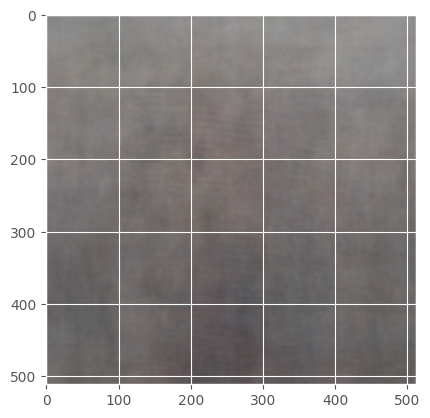

In [29]:
imgs = np.mean(data, axis=0) # This is the mean of the 'batch' channel
plt.imshow(imgs.astype(np.float64))
print("look at this average person")

This is the first step towards building our robot overlords.  We've reduced down our entire dataset to a single representation which describes what most of our dataset looks like.  There is one other very useful statistic which we can look at very easily:

This is the standard deviation - the variance of the mean


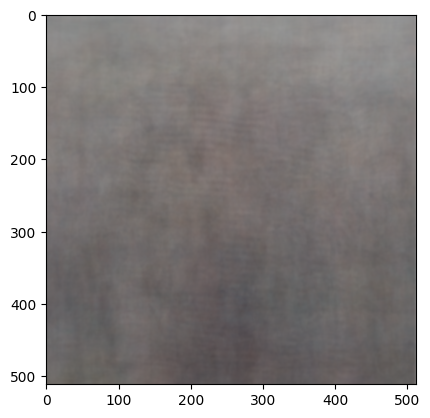

In [329]:
std_imgs = np.std(data, axis=0)
plt.imshow(mean_imgs.astype(np.float64))
print("This is the standard deviation - the variance of the mean")

So this is incredibly cool.  We've just shown where changes are likely to be in our dataset of images.  Or put another way, we're showing where and how much variance there is in our previous mean image representation.

We're looking at this per color channel.  So we'll see variance for each color channel represented separately, and then combined as a color image.  We can try to look at the average variance over all color channels by taking their mean:

Mean of all colour channels


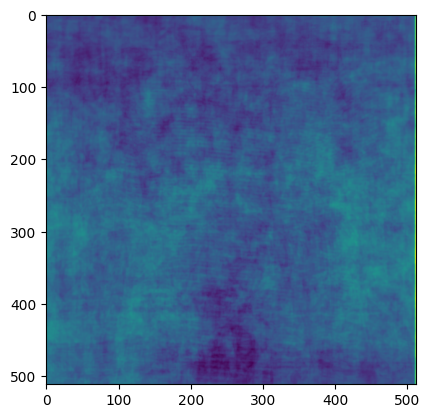

In [330]:
plt.imshow(np.mean(std_imgs, axis=2).astype(np.float64)) # Mean of all colour channels
print("Mean of all colour channels")

This is showing us on average, how every color channel will vary as a heatmap.  The more red, the more likely that our mean image is not the best representation.  The more blue, the less likely that our mean image is far off from any other possible image.

## Dataset Preprocessing

Think back to when I described what we're trying to accomplish when we build a model for machine learning?  We're trying to build a model that understands invariances.  We need our model to be able to express *all* of the things that can possibly change in our data.  Well, this is the first step in understanding what can change.  If we are looking to use deep learning to learn something complex about our data, it will often start by modeling both the mean and standard deviation of our dataset.  We can help speed things up by "preprocessing" our dataset by removing the mean and standard deviation.  What does this mean?  Subtracting the mean, and dividing by the standard deviation.  Another word for that is "normalization".

## Histograms

Let's have a look at our dataset another way to see why this might be a useful thing to do.  We're first going to convert our `batch` x `height` x `width` x `channels` array into a 1 dimensional array.  Instead of having 4 dimensions, we'll now just have 1 dimension of every pixel value stretched out in a long vector, or 1 dimensional array.

In [331]:
flattened = data.ravel()
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html
print(data[:1])
print(flattened[:10])

[[[[0.34509805 0.4392157  0.4862745  1.        ]
   [0.38431373 0.4627451  0.50980395 1.        ]
   [0.42352942 0.4862745  0.53333336 1.        ]
   ...
   [0.10588235 0.09411765 0.10588235 1.        ]
   [0.07843138 0.07843138 0.09803922 1.        ]
   [0.0627451  0.07450981 0.10196079 1.        ]]

  [[0.34901962 0.44313726 0.4862745  1.        ]
   [0.3882353  0.46666667 0.5137255  1.        ]
   [0.43137255 0.49411765 0.5411765  1.        ]
   ...
   [0.10196079 0.09411765 0.10588235 1.        ]
   [0.07843138 0.07843138 0.09803922 1.        ]
   [0.0627451  0.07450981 0.10588235 1.        ]]

  [[0.36078432 0.45490196 0.49411765 1.        ]
   [0.39215687 0.47058824 0.5137255  1.        ]
   [0.43137255 0.49803922 0.5411765  1.        ]
   ...
   [0.09803922 0.09411765 0.10196079 1.        ]
   [0.07843138 0.08235294 0.09803922 1.        ]
   [0.06666667 0.07843138 0.10588235 1.        ]]

  ...

  [[0.12941177 0.18431373 0.26666668 1.        ]
   [0.10588235 0.18431373 0.2980392

We first convert our N x H x W x C dimensional array into a 1 dimensional array.  The values of this array will be based on the last dimensions order.  So we'll have: [<font color='red'>251</font>, <font color='green'>238</font>, <font color='blue'>205</font>, <font color='red'>251</font>, <font color='green'>238</font>, <font color='blue'>206</font>, <font color='red'>253</font>, <font color='green'>240</font>, <font color='blue'>207</font>, ...]

We can visualize what the "distribution", or range and frequency of possible values are.  This is a very useful thing to know.  It tells us whether our data is predictable or not.

(array([ 1198568.,   260830.,   212888.,   254926.,   263491.,   248121.,
          244427.,   294211.,   333703.,   332705.,   337471.,   413058.,
          415213.,   388506.,   421472.,   453355.,   444158.,   490607.,
          446309.,   462715.,   480291.,   496864.,   496609.,   485999.,
          472206.,   500459.,   469787.,   496084.,   507707.,   477778.,
          459797.,   448307.,   445137.,   443930.,   529323.,   447236.,
          454373.,   468501.,   446325.,   440726.,   426300.,   426825.,
          407570.,   402072.,   390851.,   380535.,   375328.,   366713.,
          361771.,   390980.,   369826.,   381178.,   339218.,   339680.,
          333409.,   323245.,   322395.,   320603.,   322425.,   324680.,
          320194.,   313695.,   308781.,   311572.,   308114.,   306605.,
          304885.,   302731.,   300108.,   298063.,   296135.,   291556.,
          288504.,   301099.,   281213.,   277257.,   278575.,   277183.,
          277707.,   277393.,   277799

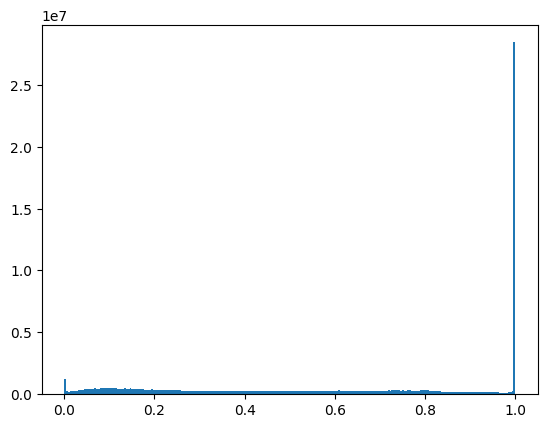

In [68]:
plt.hist(flattened.ravel(), 255)

The last line is saying give me a histogram of every value in the vector, and use 255 bins.  Each bin is grouping a range of values.  The bars of each bin describe the frequency, or how many times anything within that range of values appears.In other words, it is telling us if there is something that seems to happen more than anything else.  If there is, it is likely that a neural network will take advantage of that.


<a name="histogram-equalization"></a>
## Histogram Equalization

The mean of our dataset looks like this:

(array([5.00000e+00, 1.10000e+01, 5.60000e+01, 6.40000e+01, 5.70000e+01,
        1.09000e+02, 1.63000e+02, 2.14000e+02, 3.43000e+02, 4.77000e+02,
        6.01000e+02, 8.30000e+02, 1.02600e+03, 1.25700e+03, 1.36300e+03,
        1.55700e+03, 1.66900e+03, 1.73900e+03, 1.94600e+03, 2.18500e+03,
        2.53200e+03, 2.79100e+03, 3.08200e+03, 3.33000e+03, 3.62800e+03,
        3.75300e+03, 3.97800e+03, 4.32800e+03, 4.76700e+03, 4.99700e+03,
        5.40600e+03, 5.99100e+03, 6.48800e+03, 6.98800e+03, 7.67700e+03,
        8.04300e+03, 8.55800e+03, 9.43800e+03, 9.48100e+03, 1.01440e+04,
        1.06230e+04, 1.07020e+04, 1.11420e+04, 1.18780e+04, 1.23160e+04,
        1.25410e+04, 1.27860e+04, 1.30240e+04, 1.32370e+04, 1.34840e+04,
        1.30930e+04, 1.33950e+04, 1.40590e+04, 1.36950e+04, 1.39280e+04,
        1.39360e+04, 1.35380e+04, 1.35310e+04, 1.29920e+04, 1.25960e+04,
        1.24850e+04, 1.20460e+04, 1.18290e+04, 1.15240e+04, 1.10940e+04,
        1.09760e+04, 1.09320e+04, 1.10480e+04, 1.10

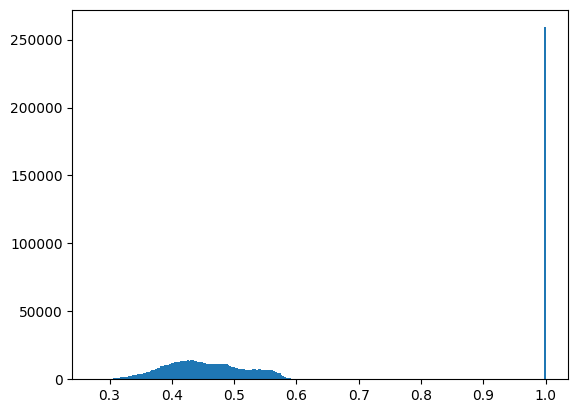

In [69]:
plt.hist(mean_img.ravel(), 255)

When we subtract an image by our mean image, we remove all of this information from it.  And that means that the rest of the information is really what is important for describing what is unique about it.

Let's try and compare the histogram before and after "normalizing our data":

Text(0.5, 1.0, '(img - mean) distribution')

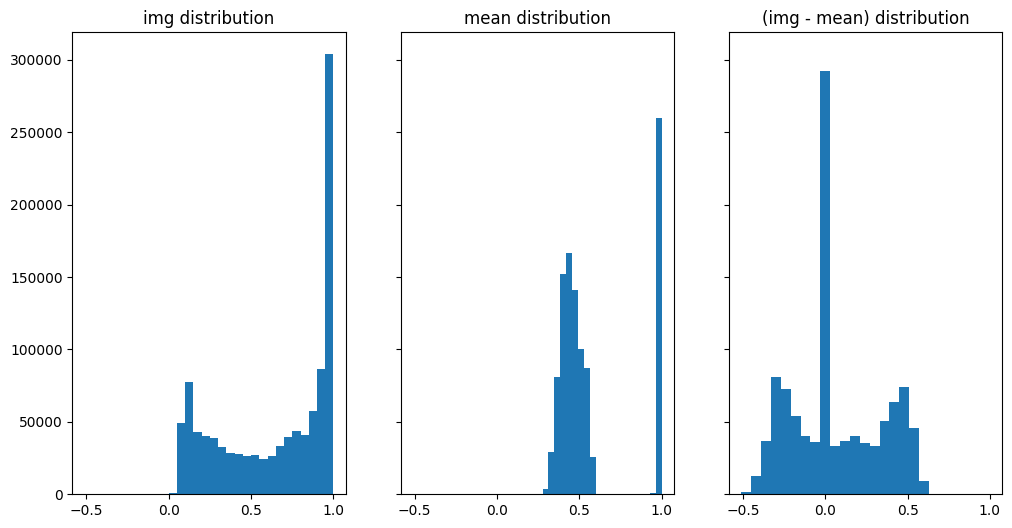

In [70]:
bins = 20
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0]).ravel(), bins)
axs[0].set_title('img distribution')
axs[1].hist((mean_img).ravel(), bins)
axs[1].set_title('mean distribution')
axs[2].hist((data[0] - mean_img).ravel(), bins)
axs[2].set_title('(img - mean) distribution')

What we can see from the histograms is the original image's distribution of values from 0 - 255.  The mean image's data distribution is mostly centered around the value 100.  When we look at the difference of the original image and the mean image as a histogram, we can see that the distribution is now centered around 0.  What we are seeing is the distribution of values that were above the mean image's intensity, and which were below it.  Let's take it one step further and complete the normalization by dividing by the standard deviation of our dataset:

C:\Users\Grace\AppData\Local\Temp\ipykernel_34964\1288352991.py:6: RuntimeWarning: invalid value encountered in divide
  axs[2].hist(((data[0] - mean_img) / std_img).ravel(), bins)


Text(0.5, 1.0, '((img - mean) / std_dev) distribution')

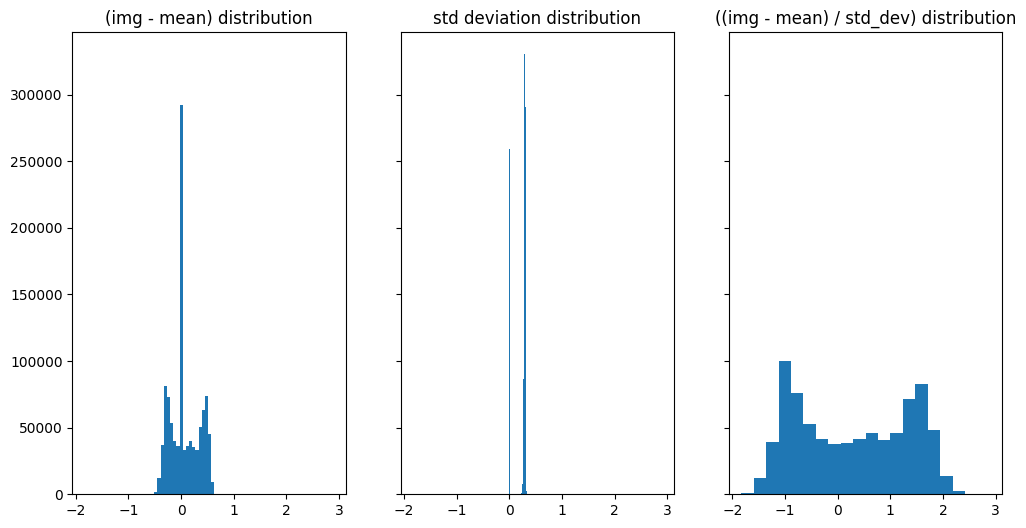

In [71]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0] - mean_img).ravel(), bins)
axs[0].set_title('(img - mean) distribution')
axs[1].hist((std_img).ravel(), bins)
axs[1].set_title('std deviation distribution')
axs[2].hist(((data[0] - mean_img) / std_img).ravel(), bins)
axs[2].set_title('((img - mean) / std_dev) distribution')

Now our data has been squished into a peak!  We'll have to look at it on a different scale to see what's going on:

In [72]:
axs[2].set_xlim([-150, 150])
axs[2].set_xlim([-100, 100])
axs[2].set_xlim([-50, 50])
axs[2].set_xlim([-10, 10])
axs[2].set_xlim([-5, 5])

(-5.0, 5.0)

What we can see is that the data is in the range of -3 to 3, with the bulk of the data centered around -1 to 1.  This is the effect of normalizing our data: most of the data will be around 0, where some deviations of it will follow between -3 to 3.

If our data does not end up looking like this, then we should either (1): get much more data to calculate our mean/std deviation, or (2): either try another method of normalization, such as scaling the values between 0 to 1, or -1 to 1, or possibly not bother with normalization at all.  There are other options that one could explore, including different types of normalization such as local contrast normalization for images or PCA based normalization but we won't have time to get into those in this course.

<a name="tensorflow-basics"></a>
# Tensorflow Basics

Let's now switch gears and start working with Google's Library for Numerical Computation, TensorFlow.  This library can do most of the things we've done so far.  However, it has a very different approach for doing so.  And it can do a whole lot more cool stuff which we'll eventually get into.  The major difference to take away from the remainder of this session is that instead of computing things immediately, we first define things that we want to compute later using what's called a `Graph`.  Everything in Tensorflow takes place in a computational graph and running and evaluating anything in the graph requires a `Session`.  Let's take a look at how these both work and then we'll get into the benefits of why this is useful:

<a name="variables"></a>
## Variables

We're first going to import the tensorflow library:

In [73]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


Let's take a look at how we might create a range of numbers.  Using numpy, we could for instance use the linear space function:

In [74]:
x = np.linspace(-3.0, 3.0, 100)

# Immediately, the result is given to us.  An array of 100 numbers equally spaced from -3.0 to 3.0.
print(x)

# We know from numpy arrays that they have a `shape`, in this case a 1-dimensional array of 100 values
print(x.shape)

# and a `dtype`, in this case float64, or 64 bit floating point values.
print(x.dtype)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

<a name="tensors"></a>
## Tensors

In tensorflow, we could try to do the same thing using their linear space function:

In [75]:
x = tf.linspace(-3.0, 3.0, 100)
print(x)

Tensor("linspace/Slice:0", shape=(100,), dtype=float32)


Instead of a `numpy.array`, we are returned a `tf.Tensor`.  The name of it is "LinSpace/Slice:0".  Wherever we see this colon 0, that just means the output of.  So the name of this Tensor is saying, the output of LinSpace.

Think of `tf.Tensor`s the same way as you would the `numpy.array`.  It is described by its `shape`, in this case, only 1 dimension of 100 values.  And it has a `dtype`, in this case, `float32`.  But *unlike* the `numpy.array`, there are no values printed here!  That's because it actually hasn't computed its values yet.  Instead, it just refers to the output of a `tf.Operation` which has been already been added to Tensorflow's default computational graph.  The result of that operation is the tensor that we are returned.

<a name="graphs"></a>
## Graphs

Let's try and inspect the underlying graph.  We can request the "default" graph where all of our operations have been added:

In [76]:
g = tf.get_default_graph()

<a name="operations"></a>
## Operations

And from this graph, we can get a list of all the operations that have been added, and print out their names:

In [77]:
[op.name for op in g.get_operations()]

['linspace/start',
 'linspace/stop',
 'linspace/num',
 'linspace/Cast',
 'linspace/Cast_1',
 'linspace/Shape',
 'linspace/Shape_1',
 'linspace/BroadcastArgs',
 'linspace/BroadcastTo',
 'linspace/BroadcastTo_1',
 'linspace/ExpandDims/dim',
 'linspace/ExpandDims',
 'linspace/ExpandDims_1/dim',
 'linspace/ExpandDims_1',
 'linspace/Shape_2',
 'linspace/Shape_3',
 'linspace/strided_slice/stack',
 'linspace/strided_slice/stack_1',
 'linspace/strided_slice/stack_2',
 'linspace/strided_slice',
 'linspace/add/y',
 'linspace/add',
 'linspace/SelectV2/condition',
 'linspace/SelectV2/t',
 'linspace/SelectV2',
 'linspace/sub/y',
 'linspace/sub',
 'linspace/Maximum/y',
 'linspace/Maximum',
 'linspace/sub_1/y',
 'linspace/sub_1',
 'linspace/Maximum_1/y',
 'linspace/Maximum_1',
 'linspace/sub_2',
 'linspace/Cast_2',
 'linspace/truediv',
 'linspace/GreaterEqual/y',
 'linspace/GreaterEqual',
 'linspace/SelectV2_1/e',
 'linspace/SelectV2_1',
 'linspace/range/start',
 'linspace/range/delta',
 'linspace/ra

So Tensorflow has named each of our operations to generally reflect what they are doing.  There are a few parameters that are all prefixed by LinSpace, and then the last one which is the operation which takes all of the parameters and creates an output for the linspace.

<a name="tensor"></a>
## Tensor

We can request the output of any operation, which is a tensor, by asking the graph for the tensor's name:

In [78]:
g.get_tensor_by_name('linspace/Slice' + ':0')

<tf.Tensor 'linspace/Slice:0' shape=(100,) dtype=float32>

What I've done is asked for the `tf.Tensor` that comes from the operation "LinSpace".  So remember, the result of a `tf.Operation` is a `tf.Tensor`.  Remember that was the same name as the tensor `x` we created before.

<a name="sessions"></a>
## Sessions

In order to actually compute anything in tensorflow, we need to create a `tf.Session`.  The session is responsible for evaluating the `tf.Graph`.  Let's see how this works:

In [79]:
# We're first going to create a session:
sess = tf.Session()

# Now we tell our session to compute anything we've created in the tensorflow graph.
computed_x = sess.run(x)
print(computed_x)

# Alternatively, we could tell the previous Tensor to evaluate itself using this session:
computed_x = x.eval(session=sess)
print(computed_x)

# We can close the session after we're done like so:
sess.close()

[-3.         -2.939394   -2.878788   -2.8181818  -2.7575758  -2.6969697
 -2.6363635  -2.5757575  -2.5151515  -2.4545455  -2.3939395  -2.3333333
 -2.2727273  -2.2121212  -2.151515   -2.090909   -2.030303   -1.969697
 -1.9090909  -1.8484848  -1.7878788  -1.7272727  -1.6666666  -1.6060605
 -1.5454545  -1.4848485  -1.4242424  -1.3636363  -1.3030303  -1.2424242
 -1.1818181  -1.121212   -1.060606   -1.         -0.939394   -0.87878776
 -0.81818175 -0.75757575 -0.6969695  -0.6363635  -0.5757575  -0.5151515
 -0.4545455  -0.39393926 -0.33333325 -0.27272725 -0.21212101 -0.151515
 -0.090909   -0.030303    0.030303    0.09090924  0.15151525  0.21212125
  0.2727275   0.3333335   0.3939395   0.4545455   0.5151515   0.57575774
  0.63636374  0.69696975  0.757576    0.818182    0.878788    0.939394
  1.          1.060606    1.121212    1.1818185   1.2424245   1.3030305
  1.3636365   1.4242425   1.4848485   1.5454545   1.606061    1.666667
  1.727273    1.787879    1.848485    1.909091    1.969697    2.0

We could also explicitly tell the session which graph we want to manage:

In [80]:
sess = tf.Session(graph=g)
sess.close()

By default, it grabs the default graph.  But we could have created a new graph like so:

In [81]:
g2 = tf.Graph()

And then used this graph only in our session.

To simplify things, since we'll be working in iPython's interactive console, we can create an `tf.InteractiveSession`:

In [82]:
sess = tf.InteractiveSession()
x.eval()

array([-3.        , -2.939394  , -2.878788  , -2.8181818 , -2.7575758 ,
       -2.6969697 , -2.6363635 , -2.5757575 , -2.5151515 , -2.4545455 ,
       -2.3939395 , -2.3333333 , -2.2727273 , -2.2121212 , -2.151515  ,
       -2.090909  , -2.030303  , -1.969697  , -1.9090909 , -1.8484848 ,
       -1.7878788 , -1.7272727 , -1.6666666 , -1.6060605 , -1.5454545 ,
       -1.4848485 , -1.4242424 , -1.3636363 , -1.3030303 , -1.2424242 ,
       -1.1818181 , -1.121212  , -1.060606  , -1.        , -0.939394  ,
       -0.87878776, -0.81818175, -0.75757575, -0.6969695 , -0.6363635 ,
       -0.5757575 , -0.5151515 , -0.4545455 , -0.39393926, -0.33333325,
       -0.27272725, -0.21212101, -0.151515  , -0.090909  , -0.030303  ,
        0.030303  ,  0.09090924,  0.15151525,  0.21212125,  0.2727275 ,
        0.3333335 ,  0.3939395 ,  0.4545455 ,  0.5151515 ,  0.57575774,
        0.63636374,  0.69696975,  0.757576  ,  0.818182  ,  0.878788  ,
        0.939394  ,  1.        ,  1.060606  ,  1.121212  ,  1.18

Now we didn't have to explicitly tell the `eval` function about our session.  We'll leave this session open for the rest of the lecture.

<a name="tensor-shapes"></a>
## Tensor Shapes

In [83]:
# We can find out the shape of a tensor like so:
print(x.get_shape())

# %% Or in a more friendly format
print(x.get_shape().as_list())

(100,)
[100]


<a name="many-operations"></a>
## Many Operations

Lets try a set of operations now.  We'll try to create a Gaussian curve.  This should resemble a normalized histogram where most of the data is centered around the mean of 0.  It's also sometimes refered to by the bell curve or normal curve.

In [84]:
# The 1 dimensional gaussian takes two parameters, the mean value, and the standard deviation, which is commonly denoted by the name sigma.
mean = 0.0
sigma = 1.0

# Don't worry about trying to learn or remember this formula.  I always have to refer to textbooks or check online for the exact formula.
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

Just like before, amazingly, we haven't actually computed anything.  We *have just added a bunch of operations to Tensorflow's graph.  Whenever we want the value or output of this operation, we'll have to explicitly ask for the part of the graph we're interested in before we can see its result.  Since we've created an interactive session, we should just be able to say the name of the Tensor that we're interested in, and call the `eval` function:

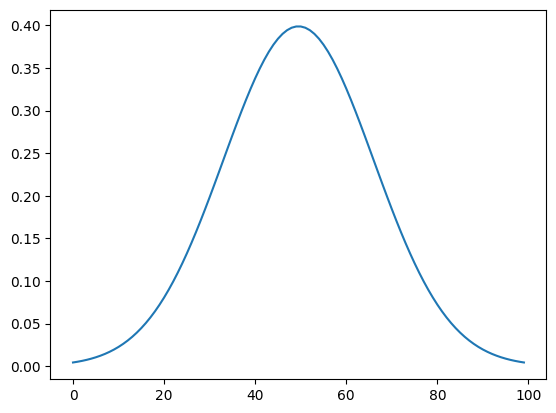

In [85]:
res = z.eval()
plt.plot(res)
# if nothing is drawn, and you are using ipython notebook, uncomment the next two lines:
#%matplotlib inline
#plt.plot(res)

# Convolution

## Creating a 2-D Gaussian Kernel

Let's try creating a 2-dimensional Gaussian - basically a 2D version of what we just did.  This can be done by multiplying a vector by its transpose.  If you aren't familiar with matrix math, I'll review a few important concepts.  This is about 98% of what neural networks do so if you're unfamiliar with this, then please stick with me through this and it'll be smooth sailing.  First, to multiply two matrices, their inner dimensions must agree, and the resulting matrix will have the shape of the outer dimensions.

So let's say we have two matrices, X and Y.  In order for us to multiply them, X's columns must match Y's rows.  I try to remember it like so:
<pre>
    (X_rows, X_cols) x (Y_rows, Y_cols)
      |       |           |      |
      |       |___________|      |
      |             ^            |
      |     inner dimensions     |
      |        must match        |
      |                          |
      |__________________________|
                    ^
           resulting dimensions
         of matrix multiplication
</pre>
But our matrix is actually a vector, or a 1 dimensional matrix.  That means its dimensions are N x 1.  So to multiply them, we'd have:
<pre>
     (N,      1)    x    (1,     N)
      |       |           |      |
      |       |___________|      |
      |             ^            |
      |     inner dimensions     |
      |        must match        |
      |                          |
      |__________________________|
                    ^
           resulting dimensions
         of matrix multiplication
</pre>

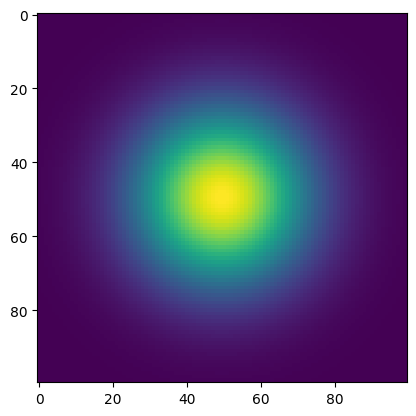

In [86]:
# Let's store the number of values in our Gaussian curve.
ksize = z.get_shape().as_list()[0]

# Let's multiply the two to get a 2d gaussian
z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))

# Execute the graph
plt.imshow(z_2d.eval())